In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.interpolate

In [3]:
pd.read_excel('../../data/age+ploidy_relation.xlsx')

,liver case,age,% 2n,% 4n,> Transfer to 100 % ->,% 2n of 100%,Pathology,Comment
0,ND022,58.0,75.0,19.0,NaN,79.787234,Y,NaN
1,ND023,59.0,85.0,10.0,NaN,89.473684,NaN,#83
2,ND32,39.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ND252,37.0,69.0,17.0,NaN,80.232558,NaN,NaN
4,ND253,33.0,85.0,9.0,NaN,90.425532,NaN,NaN
5,ND255,50.0,68.0,24.0,NaN,73.913043,NaN,NaN
6,ND256,30.0,NaN,NaN,NaN,NaN,NaN,NaN
7,ND257,25.0,NaN,NaN,NaN,NaN,NaN,NaN
8,ND258,43.0,NaN,NaN,NaN,NaN,NaN,NaN
9,ND289,48.0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
heinke = pd.read_excel('../../data/age+ploidy_relation.xlsx')
heinke[['% 2n', '% 4n']] /= 100
heinke['2n'] = heinke['% 2n'] / (heinke['% 2n'] + heinke['% 4n'])
heinke.head()

,liver case,age,% 2n,% 4n,> Transfer to 100 % ->,% 2n of 100%,Pathology,Comment,2n
0,ND022,58.0,0.75,0.19,NaN,79.787234,Y,NaN,0.797872
1,ND023,59.0,0.85,0.10,NaN,89.473684,NaN,#83,0.894737
2,ND32,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ND252,37.0,0.69,0.17,NaN,80.232558,NaN,NaN,0.802326
4,ND253,33.0,0.85,0.09,NaN,90.425532,NaN,NaN,0.904255


In [58]:
kudryavtsev = pd.read_excel('../../data/kudryavtsev_et_al_1993_table_2.xlsx')
kudryavtsev[kudryavtsev.columns[3:]] /= 100.0
kudryavtsev['age'] = kudryavtsev[['age_min', 'age_max']].mean(axis='columns')
kudryavtsev['2n_mean'] = kudryavtsev['2C_mean'] + kudryavtsev['2Cx2_mean']
kudryavtsev['2n_sem'] = kudryavtsev['2C_sem'] + kudryavtsev['2Cx2_sem']
kudryavtsev['2n_std'] = kudryavtsev['2n_sem'] * np.sqrt(kudryavtsev['n'])

In [59]:
kudryavtsev.head()

,age_min,age_max,n,2C_mean,2C_sem,2Cx2_mean,2Cx2_sem,4C_mean,4C_sem,4Cx2_mean,4Cx2_sem,age,2n_mean,2n_sem,2n_std
0,0,5,6,0.9248,0.0109,0.0288,0.0050,0.0422,0.0063,0.0030,0.0015,2.5,0.9536,0.0159,0.038947
1,6,10,3,0.8850,0.0443,0.0736,0.0225,0.0380,0.0201,0.0020,0.0010,8.0,0.9586,0.0668,0.115701
2,11,15,3,0.9050,0.0311,0.0590,0.0057,0.0270,0.0180,0.0067,0.0067,13.0,0.9640,0.0368,0.063739
3,16,20,10,0.9078,0.0139,0.0707,0.0128,0.0209,0.0334,0.0006,0.0006,18.0,0.9785,0.0267,0.084433
4,21,25,12,0.8656,0.0229,0.0690,0.0107,0.0602,0.0131,0.0026,0.0010,23.0,0.9346,0.0336,0.116394


In [60]:
ploidy = sp.interpolate.UnivariateSpline(kudryavtsev['age'].values,
                                kudryavtsev['2n_mean'].values,
                               ext=3)

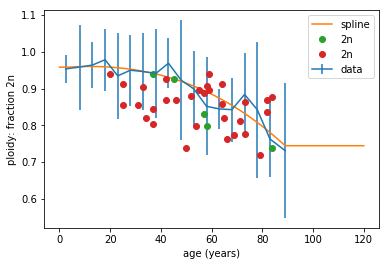

In [72]:
tt = np.linspace(0, 120, 1000)
plt.errorbar(kudryavtsev['age'].values, kudryavtsev['2n_mean'].values, kudryavtsev['2n_std'].values, label='data')
plt.plot(tt, ploidy(tt), label='spline')

plt.plot("age", "2n", data=heinke.query('Pathology == "Y"'), marker='o', ls='None')
plt.plot("age", "2n", data=heinke.query('Pathology != "Y"'), marker='o', ls='None')

plt.xlabel('age (years)')
plt.ylabel('ploidy: fraction 2n')
plt.legend()
plt.show()

<ErrorbarContainer object of 3 artists>

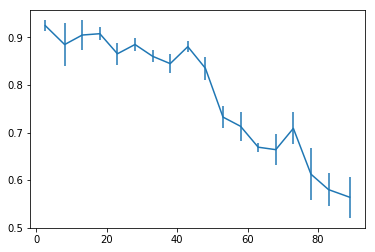

In [74]:
plt.errorbar(kudryavtsev['age'].values, kudryavtsev['2C_mean'].values, kudryavtsev['2C_sem'].values, label='data')
